In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
#!pip install xgboost
#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error








In [155]:
# import boston house price dataset
#data=sklearn.datasets.load_boston()
#print(data)
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
print(data)



{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [156]:


# Load Boston dataset from OpenML
#url = "https://www.openml.org/data/get_csv/20649148/boston"
#boston = pd.read_csv(url)

# Display the first few rows
#boston.head()


In [157]:
#into pandas dataframe
df=pd.DataFrame(data.data, columns=data.feature_names)

In [158]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [159]:


df.shape

(20640, 8)

In [160]:
# add target column
df['price']=data.target

In [161]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [162]:
df.shape

(20640, 9)

In [163]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [164]:
df.duplicated().sum()

0

In [165]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [166]:
# correlation
corr=df.corr()

<Axes: >

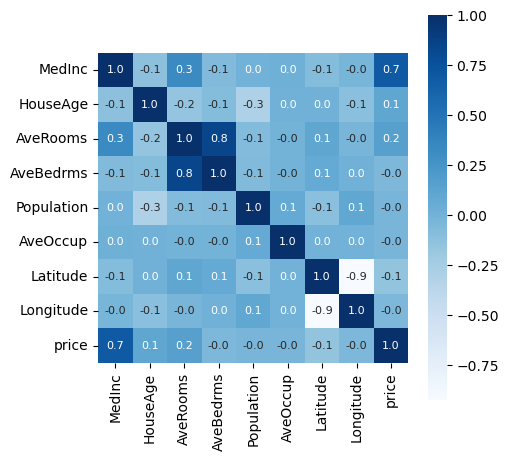

In [167]:
plt.figure(figsize=(5,5))
sns.heatmap(corr,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [168]:
# drop price column
x=df.drop('price',axis=1)
y=df['price']

In [169]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [170]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

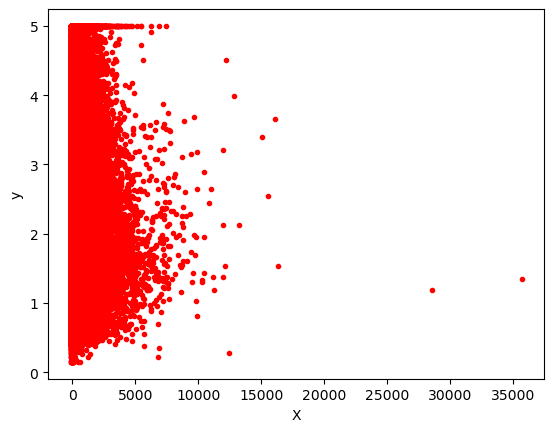

In [171]:
# to check relation between x and y
plt.plot(x, y,'r.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [172]:
# train test  split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [173]:
x_train.shape

(16512, 8)

In [174]:
y_train.shape

(16512,)

In [175]:
# model fit
#lr=LinearRegression()
#lr.fit(x_train,y_train)
#y_pred=lr.predict(x_test)
# test prediction
#y_pred1=lr.predict(x_train)
#mae=mean_absolute_error(y_test,y_pred)
#r=r2_score(y_test,y_pred)
# linear regression are not  use because data have non linear relation


In [176]:
#r

In [177]:
#mae

In [178]:
#train prediction
#r2_score(y_train,y_pred1)
#mean_absolute_error(y_train,y_pred1)

In [179]:
#plt.plot(x_train,lr.predict(x_train),color='r')
#plt.plot(x, y, "b.")
#plt.xlabel("X")
#plt.ylabel("y")
#plt.show()

In [ ]:
# RandomForest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

In [ ]:
r2_score(y_test,y_pred2)


In [ ]:
mean_absolute_error(y_test,y_pred2)

In [ ]:
# decision tree
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred3=dt.predict(x_test)

In [ ]:
r2_score(y_test,y_pred3)


In [ ]:
mean_absolute_error(y_test,y_pred3)

In [ ]:
# actual vs predicted price
plt.scatter(y_test,y_pred2)

plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()